# **S&P 500 EDA Web App**

#### Source: Wikipedia

### Function to load data from source

In [1]:
import pandas as pd

def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header=0)
    df = html[0]
    return df

In [2]:
df = load_data()
df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


### Examining sectors

In [3]:
sector_unique = df['GICS Sector'].unique()
sector_unique

array(['Industrials', 'Health Care', 'Information Technology',
       'Utilities', 'Financials', 'Materials', 'Consumer Discretionary',
       'Real Estate', 'Communication Services', 'Consumer Staples',
       'Energy'], dtype=object)

### Group by Sector

In [4]:
sector = df.groupby('GICS Sector')

In [5]:
sector.first()

,Symbol,Security,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
GICS Sector,,,,,,,
Communication Services,GOOGL,Alphabet Inc. (Class A),Interactive Media & Services,"Mountain View, California",2014-04-03,1652044,1998
Consumer Discretionary,ABNB,Airbnb,"Hotels, Resorts & Cruise Lines","San Francisco, California",2023-09-18,1559720,2008
Consumer Staples,MO,Altria,Tobacco,"Richmond, Virginia",1957-03-04,764180,1985
Energy,APA,APA Corporation,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,1841666,1954
Financials,AFL,Aflac,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
Industrials,MMM,3M,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
Information Technology,ACN,Accenture,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products and Chemicals,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [6]:
sector.describe()

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  22.0  1.150190e+06  503816.763824  29989.0  833146.75   
Consumer Discretionary  52.0  9.417031e+05  424437.605477  37996.0  820586.25   
Consumer Staples        38.0  4.932800e+05  659308.763424   7084.0   27947.75   
Energy                  22.0  8.334150e+05  654494.803186   4447.0   95502.00   
Financials              71.0  7.272561e+05  540442.918268   4962.0   79971.50   
Health Care             63.0  8.428977e+05  558701.706093   1800.0  312190.00   
Industrials             78.0  7.241301e+05  632614.510086   4281.0   76590.50   
Information Technology  67.0  9.005804e+05  498502.693082   2488.0  759324.00   
Materials               28.0  8.470378e+05  713987.434946   2969.0   67840.25   
Real Estate             31.0  9.564368e+05  373794.645688  34903.0  892604.00   
Utilities               31.0  8.730384e+05  477431.209001   4904.0  742555.00   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1225195.0  1564708.00  1754301.0  
Consumer Discretionary   943392.5  1202861.75  1590895.0  
Consumer Staples          78950.0   929235.25  1996862.0  
Energy                   946736.0  1477022.75  1841666.0  
Financials               886982.0  1139155.00  1633917.0  
Health Care              885725.0  1118775.50  1964738.0  
Industrials              760177.5  1228521.00  1996810.0  
Information Technology   896878.0  1304009.50  1730168.0  
Materials                915994.5  1419355.00  2005951.0  
Real Estate             1034054.0  1067255.50  1705696.0  
Utilities                922224.0  1078609.50  1868275.0

### Examine data by sector

In [7]:
sector.get_group('Health Care')

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999
15,ALGN,Align Technology,Health Care,Health Care Supplies,"Tempe, Arizona",2017-06-19,1097149,1997
33,AMGN,Amgen,Health Care,Biotechnology,"Thousand Oaks, California",1992-01-02,318154,1980
...,...,...,...,...,...,...,...,...
474,VTRS,Viatris,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
487,WAT,Waters Corporation,Health Care,Life Sciences Tools & Services,"Milford, Massachusetts",2002-01-02,1000697,1958
491,WST,West Pharmaceutical Services,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


### Finance Data

In [8]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [9]:
import yfinance as yf

### List of S&P 500 Symbols

In [10]:
list(df.Symbol)

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'BXP',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG'

### Retrieve stock data

In [11]:
data = yf.download(
    tickers = list(df.Symbol),
    period = "ytd",
    interval = "1d",
    group_by = "ticker",
    auto_adjust = True,
    prepost = True,
    threads = True,
    proxy = None
)

[**********************49%%                      ]  244 of 503 completed

$BF.B: possibly delisted; No price data found  (period=ytd)


[*********************100%%**********************]  503 of 503 completed

2 Failed downloads:
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (period=ytd)')
['BRK.B']: YFChartError('%ticker%: No data found, symbol may be delisted')


In [12]:
data.head()

Ticker            UAL                                                   AXON  \
Price            Open       High        Low      Close    Volume        Open   
Date                                                                           
2024-01-02  41.130001  41.689999  40.560001  40.720001   6331300  254.470001   
2024-01-03  40.060001  40.560001  39.400002  39.529999   9730300  250.619995   
2024-01-04  39.709999  40.889999  39.599998  40.470001   6913800  247.429993   
2024-01-05  40.410000  42.009998  40.279999  41.759998   7193900  244.500000   
2024-01-08  41.480000  43.520000  41.439999  42.919998  13003800  244.449997   

Ticker                                                  ...        CSX  \
Price             High         Low       Close  Volume  ...       Open   
Date                                                    ...              
2024-01-02  256.010010  249.529999  251.630005  532400  ...  34.406058   
2024-01-03  252.240005  247.270004  247.429993  333000  ...  34.406061   
2024-01-04  249.559998  244.350006  244.929993  494200  ...  34.356396   
2024-01-05  246.100006  241.720001  244.210007  408600  ...  34.435854   
2024-01-08  251.750000  244.009995  251.610001  344400  ...  34.505384   

Ticker                                                        XOM              \
Price            High        Low      Close    Volume        Open        High   
Date                                                                            
2024-01-02  34.743762  34.217342  34.386192   9285300   99.185094  101.327618   
2024-01-03  34.684169  34.286872  34.425926  10827300  100.511883  101.838682   
2024-01-04  34.743762  34.267004  34.485519   9283400  102.290774  102.772348   
2024-01-05  34.684166  34.336531  34.386192   7118800  101.396418  101.622467   
2024-01-08  34.535181  34.167680  34.455719   8977600   98.998368   99.303037   

Ticker                                        
Price              Low       Close    Volume  
Date                                          
2024-01-02   99.116298  100.600342  23483000  
2024-01-03   99.912377  101.445557  23490800  
2024-01-04  100.295672  100.561028  19395200  
2024-01-05  100.374295  100.865700  15825000  
2024-01-08   97.199826   99.185097  23370100  

[5 rows x 2517 columns]

### Data subset of query symbol

In [13]:
data['AAPL']

Price,Open,High,Low,Close,Volume
Date,,,,,
2024-01-02,186.658310,187.944930,183.406880,185.152283,82488700
2024-01-03,183.736010,185.391653,182.948077,183.765930,58414500
2024-01-04,181.671458,182.608991,180.404806,181.432098,71983600
2024-01-05,181.511879,182.279846,179.696654,180.703995,62303300
2024-01-08,181.611610,185.112398,181.023163,185.072495,59144500
...,...,...,...,...,...
2024-07-17,229.449997,231.460007,226.639999,228.880005,57345900
2024-07-18,230.279999,230.440002,222.270004,224.179993,66034600
2024-07-19,224.820007,226.800003,223.279999,224.309998,49151500


In [17]:
df = pd.DataFrame(data['ABT'].Close)
df['Date'] = df.index
df

,Close,Date
Date,,
2024-01-02,108.208290,2024-01-02
2024-01-03,107.883224,2024-01-03
2024-01-04,109.321419,2024-01-04
2024-01-05,109.144104,2024-01-05
2024-01-08,110.720192,2024-01-08
...,...,...
2024-07-17,104.680000,2024-07-17
2024-07-18,100.070000,2024-07-18
2024-07-19,102.029999,2024-07-19


### Plot closing price of query symbol

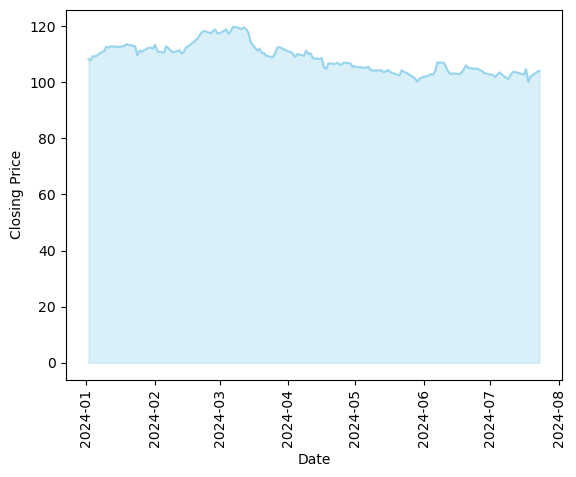

In [20]:
import matplotlib.pyplot as plt
plt.fill_between(df.Date, df.Close, color='skyblue', alpha=0.3)
plt.plot(df.Date, df.Close, color='skyblue', alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [21]:
import matplotlib.pyplot as plt

def price_plot(symbol):
    df = pd.DataFrame(data[symbol].Close)
    df['Date'] = df.index
    plt.fill_between(df.Date, df.Close, color='skyblue', alpha=0.3)
    plt.plot(df.Date, df.Close, color='skyblue', alpha=0.8)
    plt.xticks(rotation=90)
    plt.title(symbol, fontweight='bold')
    plt.xlabel('Date', fontweight='bold')
    plt.ylabel('Closing Price', fontweight='bold')
    return plt.show()

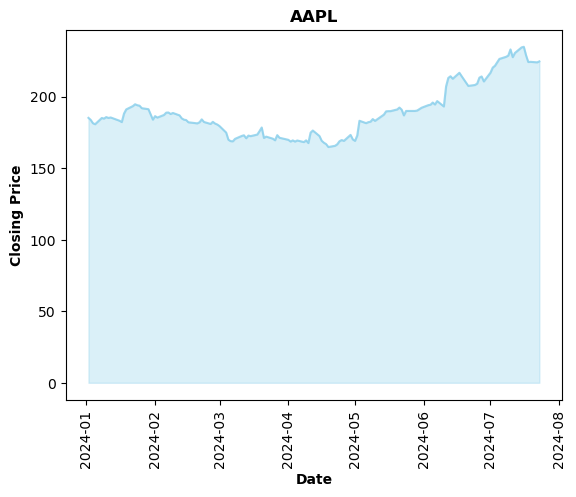

In [22]:
price_plot('AAPL')

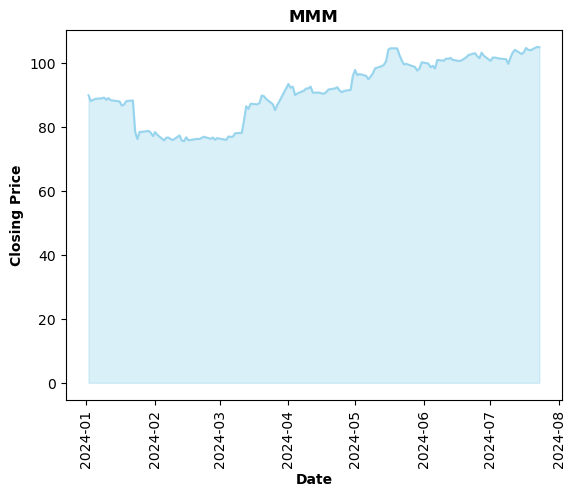

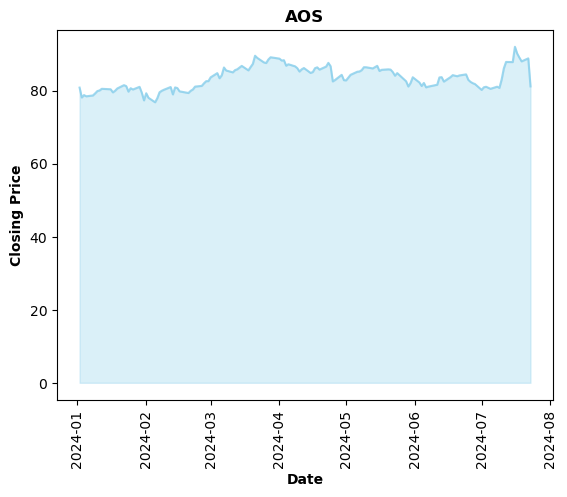

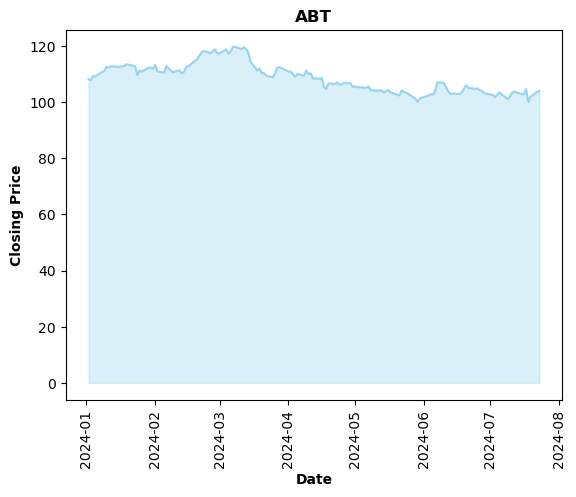

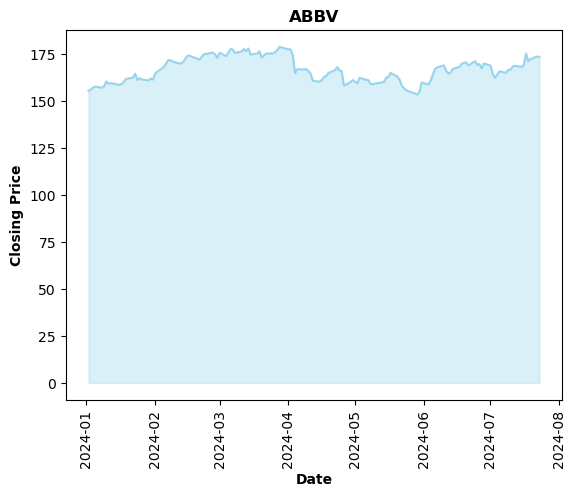

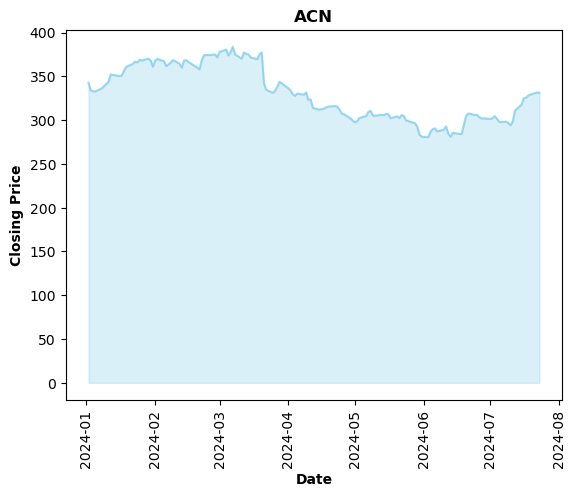

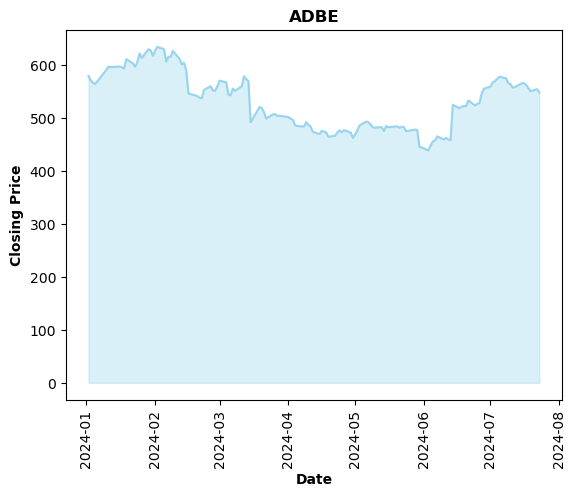

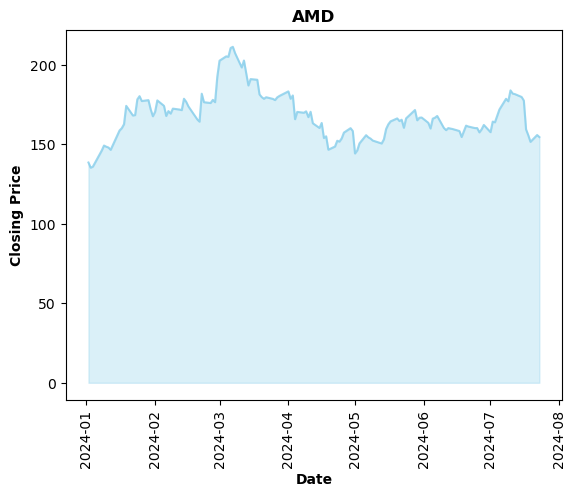

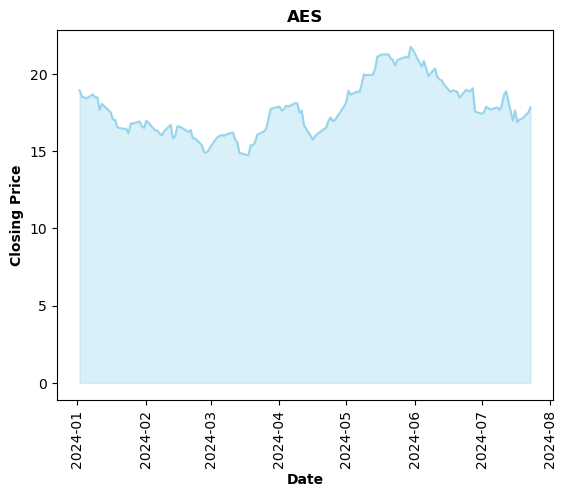

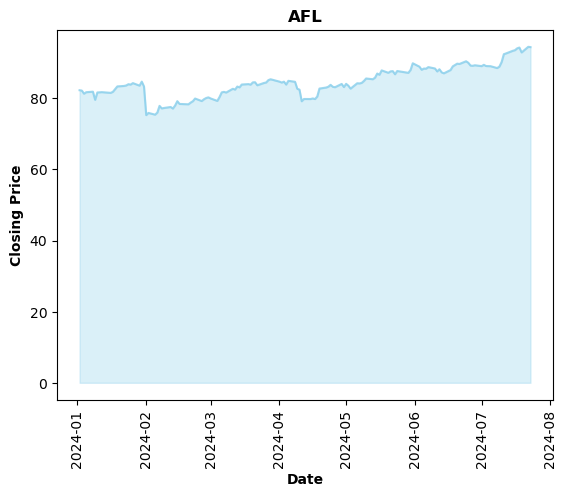

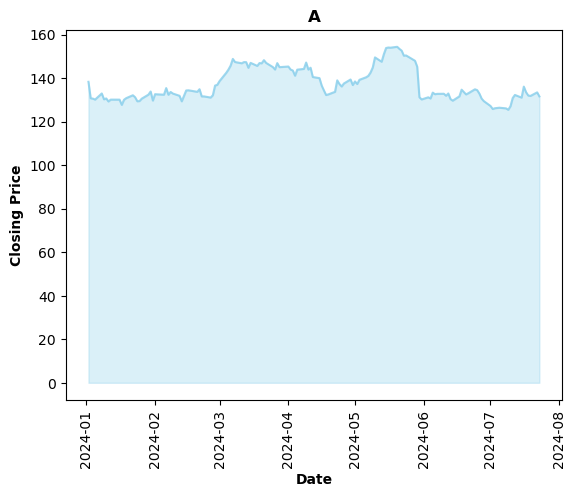

In [24]:
#iterate over multiple companies by for loop

df = load_data()

for i in list(df.Symbol)[:10]:
    price_plot(i)